In [9]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#### Watch Video

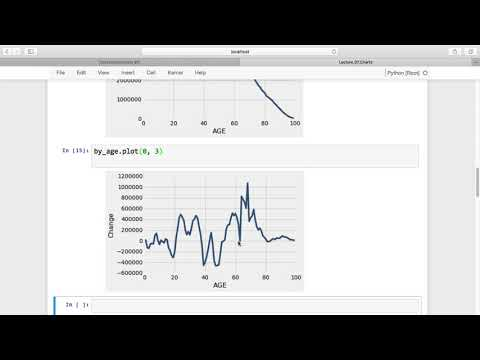

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('pcEadlLnFBw', width=800, height=300)

## Line Graphs

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
# From Lecture 6

# As of Jan 2017, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A copy can be accessed here in case census.gov moves the file:
# data = 'http://inferentialthinking.com/notebooks/nc-est2015-agesex-res.csv'

full_census_table = Table.read_table("nc-est2014-agesex-res.csv")
full_census_table
partial = full_census_table.select(['SEX', 'AGE', 4, 9])
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
ratio = (us_pop.column(3) / us_pop.column(2))
census = us_pop.with_columns(
        'Change', us_pop.column(3) - us_pop.column(2), 
        'Total Growth', ratio - 1,
        'Annual Growth', ratio ** (1/5) - 1)
census.set_format([2, 3, 4], NumberFormatter)
census.set_format([5, 6], PercentFormatter)

SEX,AGE,2010,2015,Change,Total Growth,Annual Growth
0,0,"3,951,330","3,978,038","26,708",0.68%,0.13%
0,1,"3,957,888","3,968,564","10,676",0.27%,0.05%
0,2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
0,3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
0,4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
0,5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
0,6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
0,7,"4,043,046","4,148,360","105,314",2.60%,0.52%
0,8,"4,025,604","4,167,887","142,283",3.53%,0.70%
0,9,"4,125,415","4,133,564","8,149",0.20%,0.04%


In [3]:
by_age = census.where('SEX', 0).drop('SEX').where('AGE', are.between(0, 100))
by_age

AGE,2010,2015,Change,Total Growth,Annual Growth
0,"3,951,330","3,978,038","26,708",0.68%,0.13%
1,"3,957,888","3,968,564","10,676",0.27%,0.05%
2,"4,090,862","3,966,583","-124,279",-3.04%,-0.62%
3,"4,111,920","3,974,061","-137,859",-3.35%,-0.68%
4,"4,077,551","4,020,035","-57,516",-1.41%,-0.28%
5,"4,064,653","4,018,158","-46,495",-1.14%,-0.23%
6,"4,073,013","4,019,207","-53,806",-1.32%,-0.27%
7,"4,043,046","4,148,360","105,314",2.60%,0.52%
8,"4,025,604","4,167,887","142,283",3.53%,0.70%
9,"4,125,415","4,133,564","8,149",0.20%,0.04%


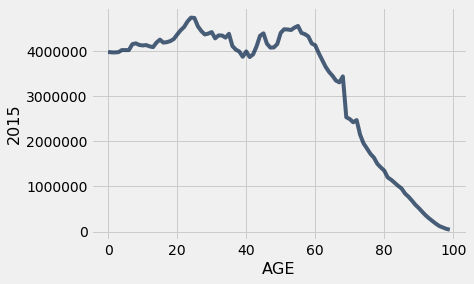

In [4]:
by_age.plot(0, 2)

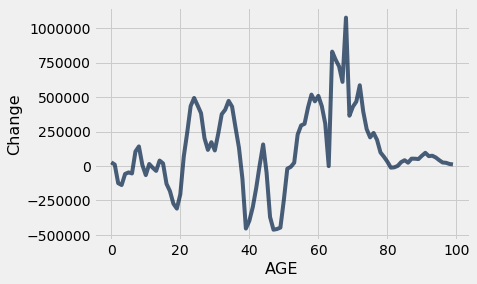

In [5]:
by_age.plot(0, 3)


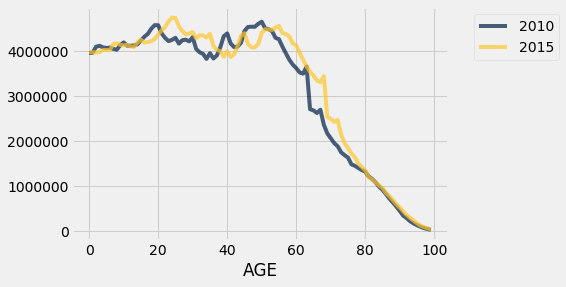

In [6]:
by_age.select(0, 1, 2).plot(0)

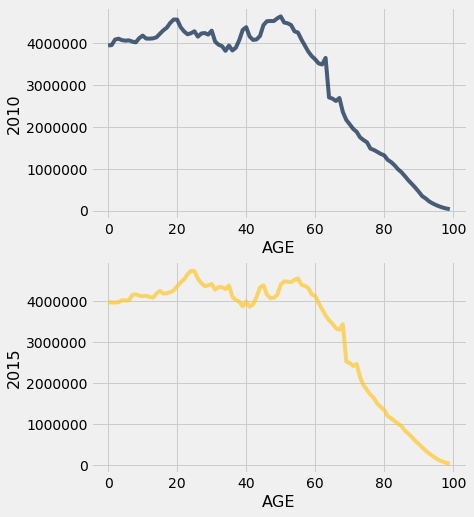

In [7]:
by_age.select(0, 1, 2).plot(0, overlay=False)

#### Watch Video 

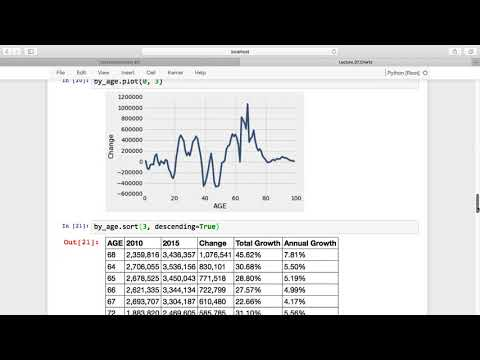

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('5-NEr5Pnybk', width=800, height=300)

## Example 1: Age

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [8]:
by_age.labels

('AGE', '2010', '2015', 'Change', 'Total Growth', 'Annual Growth')

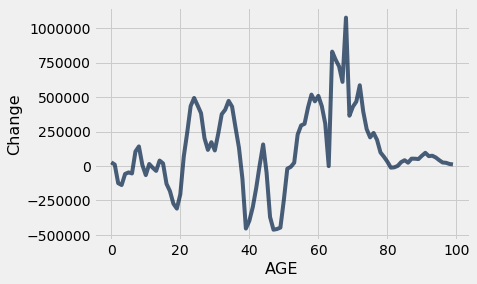

In [9]:
by_age.plot(0, 3)

In [10]:
by_age.sort(3, descending=True)

AGE,2010,2015,Change,Total Growth,Annual Growth
68,"2,359,816","3,436,357","1,076,541",45.62%,7.81%
64,"2,706,055","3,536,156","830,101",30.68%,5.50%
65,"2,678,525","3,450,043","771,518",28.80%,5.19%
66,"2,621,335","3,344,134","722,799",27.57%,4.99%
67,"2,693,707","3,304,187","610,480",22.66%,4.17%
72,"1,883,820","2,469,605","585,785",31.10%,5.56%
58,"3,802,447","4,320,522","518,075",13.62%,2.59%
60,"3,616,721","4,125,792","509,071",14.08%,2.67%
24,"4,243,602","4,737,345","493,743",11.63%,2.23%
34,"3,822,189","4,294,838","472,649",12.37%,2.36%


In [11]:
2010 - 68

1942

In [12]:
2015 - 68

1947

#### Watch Video

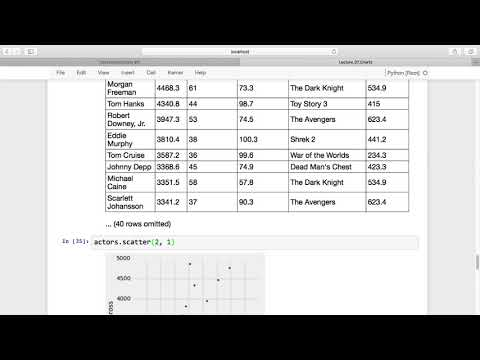

In [3]:

from IPython.display import YouTubeVideo

YouTubeVideo('6mPOvbubJSM', width=800, height=300)

## Scatter Plots

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [13]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


In [14]:
actors = actors.relabeled(5, '#1 Movie Gross')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


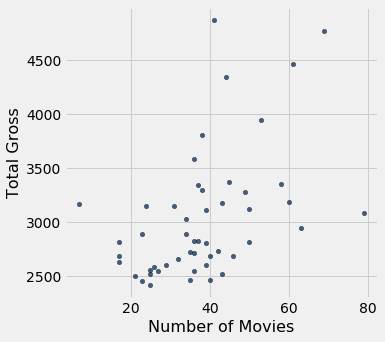

In [15]:
actors.scatter(2, 1)

In [16]:
actors.labels

('Actor',
 'Total Gross',
 'Number of Movies',
 'Average per Movie',
 '#1 Movie',
 '#1 Movie Gross')

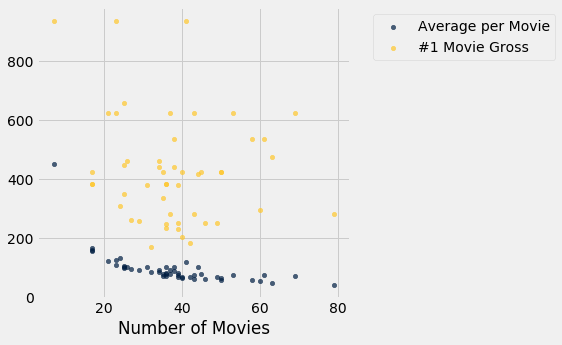

In [17]:
actors.select(2, 3, 5).scatter(0)

In [18]:
actors.where(5, are.above(800))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
Andy Serkis,2890.6,23,125.7,Star Wars: The Force Awakens,936.7


In [19]:
#Who is that outlier in terms of Average per Movie?
actors.where(3 , are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


#### Watch Video

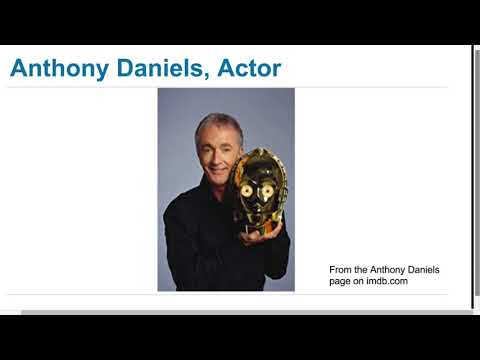

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('WxrsPBNklks', width=800, height=300)

## Example 2: Actors

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [20]:
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


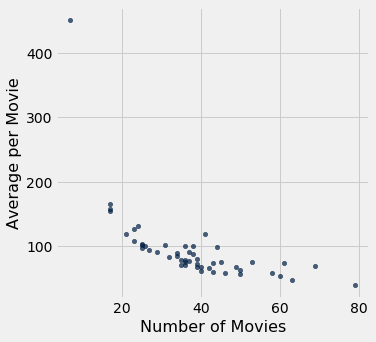

In [21]:
actors.scatter(2, 3)

In [22]:
actors.where(2, are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [23]:
actors.where(2, are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


#### How to choose

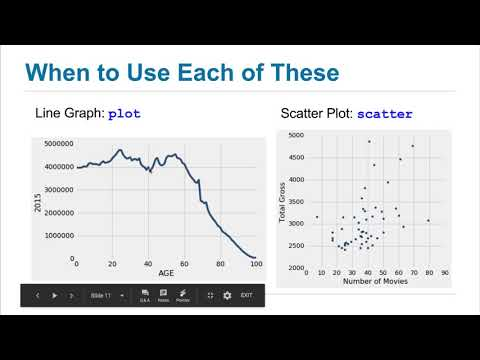

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('CQIc1pjkyEM', width=800, height=300)

#### Types of data

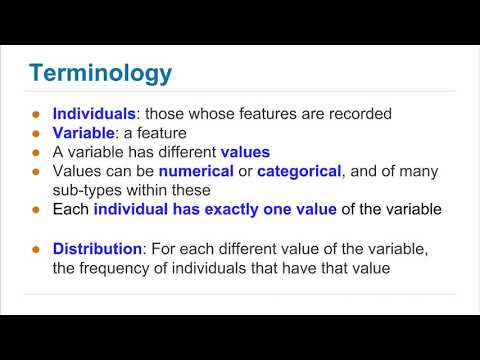

In [6]:
from IPython.display import YouTubeVideo

YouTubeVideo('EHRg9ojcVRQ', width=800, height=300)

## Distributions

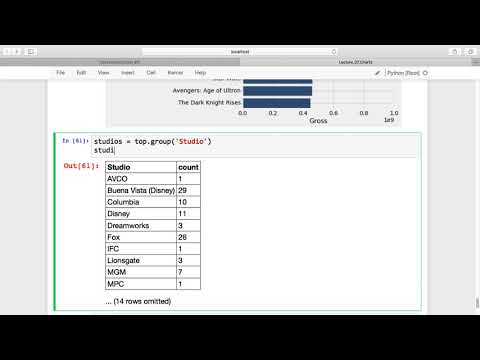

In [12]:
from IPython.display import YouTubeVideo

YouTubeVideo('ME3LjCrvxik', width=800, height=300)

**Please run all cells before this cell, including the previous examples and the import cell at the top of the notebook.**

In [10]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


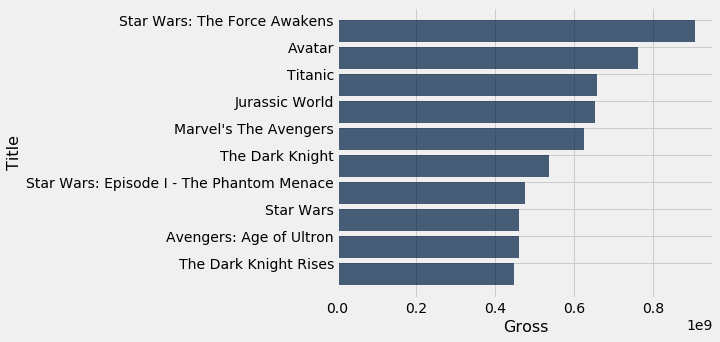

In [25]:
top10 = top.take(np.arange(10))
top10.barh(0, 2)

In [26]:
studios = top.group('Studio')
studios.show()

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


In [27]:
sum(studios.column(1))

200

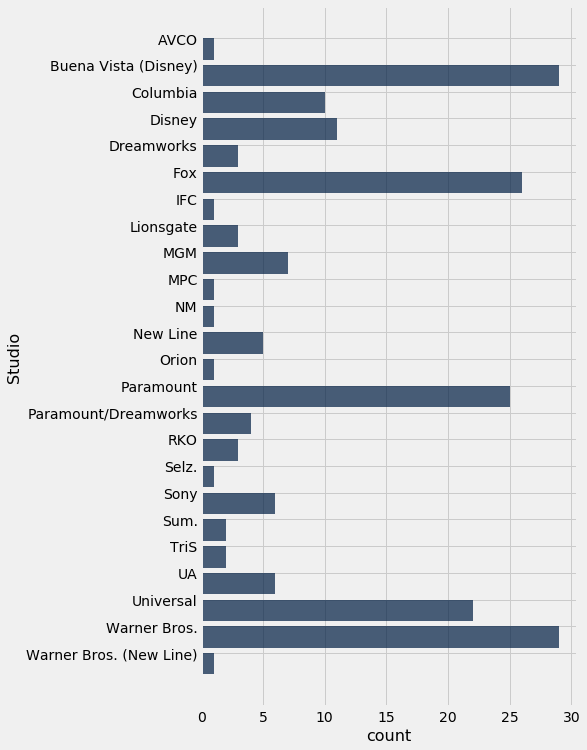

In [28]:
studios.barh(0)

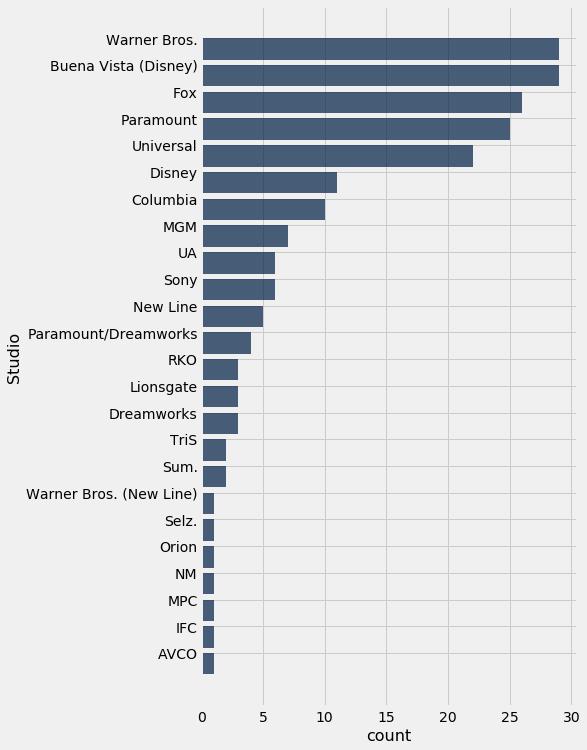

In [29]:
studios.sort(1, descending=True).barh(0)

#### Watch Video

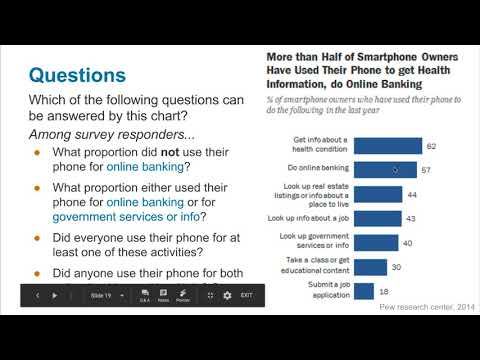

In [11]:
from IPython.display import YouTubeVideo

YouTubeVideo('hMvuoBFWC1o', width=800, height=300)